# **Multiple Linear Regression Using Gradient Descent**

****Using Gradient Descent****
LearningRate(α) =  0.001

Values of θ:-
θ0 =  15.3868
θ1 =  -0.4847
θ2 =  0.5117
θ3 =  -0.4911
θ4 =  0.7447
θ5 =  -0.2772
θ6 =  2.9847
θ7 =  -0.1594
θ8 =  -0.8713
θ9 =  0.3598
θ10 =  -0.3352
θ11 =  -1.4435
θ12 =  0.2629
θ13 =  -2.469

------------------------------------

LearningRate(α) =  0.009

Values of θ:-
θ0 =  24.3316
θ1 =  -1.0021
θ2 =  0.8969
θ3 =  -0.0172
θ4 =  0.5647
θ5 =  -1.2148
θ6 =  3.7198
θ7 =  -0.023
θ8 =  -2.5445
θ9 =  2.046
θ10 =  -1.0536
θ11 =  -1.667
θ12 =  0.0551
θ13 =  -3.4822

------------------------------------

LearningRate(α) =  0.05

Values of θ:-
θ0 =  24.3345
θ1 =  -1.1421
θ2 =  1.12
θ3 =  0.3532
θ4 =  0.4863
θ5 =  -1.7043
θ6 =  3.5828
θ7 =  0.0738
θ8 =  -2.817
θ9 =  3.0358
θ10 =  -1.9585
θ11 =  -1.7925
θ12 =  -0.0515
θ13 =  -3.5016

------------------------------------

LearningRate(α) =  0.025

Values of θ:-
θ0 =  24.3345
θ1 =  -1.1224
θ2 =  1.0944
θ3 =  0.2831
θ4 =  0.5013
θ5 =  -1.6593
θ6 =  3.5982
θ7 =  0.0529
θ8 =  -2.

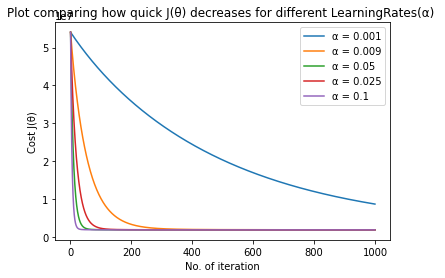

In [1]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

#loading dataset
X,y = datasets.load_boston(return_X_y = True) 
X_train_actual = X[0:400, : ] #400x13

#adding x0 = 1 as 1st column for all rows
X_train = np.zeros((X_train_actual.shape[0],X_train_actual.shape[1]+1))
X_train[:,0] = np.ones((X_train_actual.shape[0]))

X_train[:,1:] = X_train_actual

y_train = y[0:400]

#print(y_train.shape)
#print(X_train.shape)

#testData
X_test_actual = X[400:506,:]
X_test = np.zeros((X_test_actual.shape[0],X_test_actual.shape[1]+1))

X_test[:,0] = np.ones((X_test_actual.shape[0]))
X_test[:,1:] = X_test_actual

y_test = y[400:506]

#scaling
sc = StandardScaler()
sc.fit(X_train[:,1:])

X_train[:,1:] = sc.transform(X_train[:,1:])
X_test[:,1:] = sc.transform(X_test[:,1:])

#graddesc algorithm implementation
print("****Using Gradient Descent****")
theta = np.zeros((X_train.shape[1],5))

iter = 1000

alpha = [0.001,0.009,0.05,0.025,0.1]

m = 400
n = 14

array_of_costs = []

for j in range(0,len(alpha)):
  cost = []
  for i in range(iter):
    updated_theta = np.zeros((X_train.shape[1],5))
    h = np.dot(X_train,theta[:,j])
    err = h - y_train
    
    for k in range(n):
      updated_theta[k] = np.sum(err*(X_train.T)[k])
      
    theta[:,j] = theta[:,j] - alpha[j]* (1/m) * updated_theta[:,j]
    
    cost.append((1/2*m)*sum(err**2))
  array_of_costs.append(cost)
   
  print("LearningRate(\u03B1) = ",alpha[j])
  print("\nValues of \u03B8:-")
  for k in range(0,len(theta[:,j])):
    print("\u03B8{} = ".format(k),round(theta[k,j],4)) 
  
  print("\n------------------------------------\n")

#Plotting no. of iteration vs cost function for different learning rate(alpha)
for i in range(0,len(alpha)) :
  plt.plot(np.arange(1,1001),array_of_costs[i], label = "\u03B1 = {}".format(alpha[i]))
  plt.legend()
  plt.xlabel("No. of iteration")
  plt.ylabel("Cost J(\u03B8)")
  plt.title("Plot comparing how quick J(\u03B8) decreases for different LearningRates(\u03B1) ")




# **Multiple Linear Regression Using Normal Equation**

In [2]:
#normal eq
print("****Using Normal Equation****")

theta_normal = np.zeros(14)

theta_normal = (np.linalg.pinv((X_train.T).dot(X_train))).dot((X_train.T).dot(y_train))

for k in range(0,len(theta_normal)):
    print("\u03B8{} = ".format(k),round(theta_normal[k],4)) 
#print(theta_normal)

****Using Normal Equation****
θ0 =  24.3345
θ1 =  -1.1437
θ2 =  1.1219
θ3 =  0.3591
θ4 =  0.485
θ5 =  -1.7062
θ6 =  3.5817
θ7 =  0.0755
θ8 =  -2.8156
θ9 =  3.0519
θ10 =  -1.975
θ11 =  -1.7937
θ12 =  -0.0525
θ13 =  -3.5024
